In [1]:
import os
thisFilePath=os.path.abspath('.')
os.chdir(thisFilePath)
os.getcwd()

'D:\\my python file\\mypython'

## 导入数据

In [2]:
#导入数据表格1，命名为df1
import pandas as pd
df1=pd.read_csv('Basket-2018-06-01-2018-07-05.csv')
df1.head()

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018/6/1,D007,3,250458,8.0
1,2018/6/1,D007,3,250200,32.7
2,2018/6/1,D007,1,161068,16.8
3,2018/6/1,D007,8,5325,30.4
4,2018/6/1,D007,8,5361,191.3


In [3]:
#导入数据表格1，命名为df2
import pandas as pd
df2=pd.read_csv('item-2018-06-01-2018-07-05.csv')
df2.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018/6/1,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018/6/1,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018/6/1,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018/6/1,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018/6/1,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


## 数据概览

In [4]:
df1.shape

(571552, 5)

In [5]:
df2.shape

(1048575, 10)

In [6]:
df1.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


In [7]:
df2.describe()

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.016397e+00,1.611352e+05,1.147050e+05,1.490041e+00,1.363701e+01,1.483649e+01,-1.960952e+00
std,2.478932e+00,8.605571e+04,8.133691e+04,8.255032e+00,1.089738e+02,2.504771e+01,6.330616e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,-1.200000e+02,-8.700000e+02,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.477400e+04,2.183500e+04,1.000000e+00,3.900000e+00,3.800000e+00,-1.500000e+00
50%,2.000000e+00,1.695360e+05,1.244580e+05,1.000000e+00,7.500000e+00,7.900000e+00,0.000000e+00
75%,3.000000e+00,2.177830e+05,1.959900e+05,1.000000e+00,1.250000e+01,1.580000e+01,0.000000e+00
max,2.000000e+01,3.148270e+05,2.247450e+05,4.020000e+03,6.912000e+04,1.980000e+03,6.960000e+02


## 数据清洗

In [8]:
df1.dtypes #查看一下各个列的数据类型

SHOP_DATETIME      object
STORE_CODE         object
POS_NO              int64
BASK_CODE           int64
BASK_SPEND        float64
dtype: object

In [9]:
df2.dtypes

SDATE               object
STORE_CODE          object
POSID                int64
BASK_CODE            int64
PROD_CODE            int64
ITEM_QUANTITY      float64
ITEM_SPEND         float64
NORMAL_PRICE       float64
DISCOUNT_TYPE       object
DISCOUNT_AMOUNT    float64
dtype: object

In [10]:
#从上面发现列名不符合Python的命名规范，对列名进行一下重命名，采用下划线命名法：
df1.rename(columns = lambda x: x.replace(' ', '_').replace('-', '_'), inplace=True)
df1.dtypes 

SHOP_DATETIME_     object
STORE_CODE         object
POS_NO_             int64
BASK_CODE___        int64
BASK_SPEND        float64
dtype: object

In [11]:
df2.rename(columns = lambda x: x.replace(' ', '_').replace('-', '_'), inplace=True)
df2.dtypes 

SDATE               object
STORE_CODE          object
POSID                int64
BASK_CODE_           int64
PROD_CODE            int64
ITEM_QUANTITY      float64
ITEM_SPEND         float64
NORMAL_PRICE       float64
DISCOUNT_TYPE       object
DISCOUNT_AMOUNT    float64
dtype: object

In [12]:
#下单日期应为datetime类型，需要进行处理。
df1["SHOP_DATETIME_"] = pd.to_datetime(df1["SHOP_DATETIME_"]) 
df2["SDATE"].sample(5)

566850    2018/6/11
458616     2018/6/9
595153    2018/6/11
112914     2018/6/7
534050     2018/6/9
Name: SDATE, dtype: object

In [13]:
df2["SDATE"] = pd.to_datetime(df2["SDATE"]) 
df2["SDATE"].sample(5)

578867   2018-06-11
77167    2018-06-02
168368   2018-06-04
174427   2018-06-04
645300   2018-06-10
Name: SDATE, dtype: datetime64[ns]

In [14]:
#缺失值处理
df1.isnull().sum(axis=0)

SHOP_DATETIME_    0
STORE_CODE        0
POS_NO_           0
BASK_CODE___      0
BASK_SPEND        0
dtype: int64

In [15]:
df2.isnull().sum(axis=0)

SDATE              0
STORE_CODE         0
POSID              0
BASK_CODE_         0
PROD_CODE          0
ITEM_QUANTITY      0
ITEM_SPEND         0
NORMAL_PRICE       0
DISCOUNT_TYPE      0
DISCOUNT_AMOUNT    0
dtype: int64

In [16]:
#简单查看一下是否有异常值
df1.describe()

,POS_NO_,BASK_CODE___,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


In [17]:
#看一下是否有重复值
df1.duplicated().sum()

0

In [18]:
df2.duplicated().sum()   #无需处理

128777

## 数据分析

#### 门店信息汇总分析

In [19]:
store_number=df1.drop_duplicates(subset=['STORE_CODE'])
store_number #查看共涉及到商店的数量

,SHOP_DATETIME_,STORE_CODE,POS_NO_,BASK_CODE___,BASK_SPEND
0,2018-06-01,D007,3,250458,8.00
12,2018-06-01,A019,1,192101,15.37
13,2018-06-01,D008,1,197147,10.70
16,2018-06-01,D009,3,144146,3.60
24,2018-06-02,A001,6,229732,7.50
35,2018-06-01,D002,4,143637,132.80
62,2018-06-01,D003,2,53190,30.90
64,2018-06-01,D004,1,173594,21.00
69,2018-06-01,D005,2,204925,71.40
73,2018-06-01,D006,3,148666,26.99


In [20]:
store_number.shape   #24个商店

(24, 5)

In [21]:
store_number=df2.drop_duplicates(subset=['STORE_CODE'])
store_number

,SDATE,STORE_CODE,POSID,BASK_CODE_,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.30
288,2018-06-01,A019,2,24592,194906,0.056,1.88,33.6,n,0.00
366,2018-06-01,D008,4,17849,77420,1.000,92.80,112.0,p,-19.20
500,2018-06-01,D009,3,144271,83512,2.000,4.40,2.2,n,0.00
808,2018-06-02,A001,6,229611,15930,1.000,1.80,1.8,n,0.00
1006,2018-06-01,D002,4,143702,189589,1.000,25.50,29.5,p,-4.00
1800,2018-06-01,D003,2,53026,194690,1.074,3.20,3.9,p,-0.99
1843,2018-06-01,D004,2,15875,91677,1.000,4.90,4.9,n,0.00
2009,2018-06-01,D005,2,204976,221923,1.000,14.90,20.5,p,-5.60
2112,2018-06-01,D006,3,148613,219924,1.000,8.80,8.8,n,0.00


In [22]:
store_number.shape #24个商店

(24, 10)

In [23]:
import matplotlib.pyplot as plt
df1_spend=df1.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending = False)#商店按消费额大小排序
df1_spend.set_index('STORE_CODE',inplace=True)
df1_spend.plot(kind='barh')   

##### df1各商店的消费额，可以看出A001店消费额最高，D003消费额最低

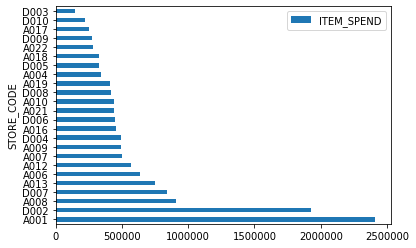

In [24]:
df2_spend=df2.groupby('STORE_CODE')['ITEM_SPEND'].sum().reset_index().sort_values(by = 'ITEM_SPEND',ascending = False)#商店按消费额大小排序
df2_spend.set_index('STORE_CODE',inplace=True)
df2_spend.plot(kind='barh')

###### df2各商店的消费额，也可以看出A001店消费额最高，D003消费额最低，其余各门店的消费额的情况可以直观查看

#### 各商店的销售商品的个数

In [25]:
df1_goods = df1.groupby(["STORE_CODE"])["BASK_CODE___"].unique()
df1_goods_num = pd.Series([len(d) for d in df1_goods], index=df1_goods.index)
df1_goods_num

STORE_CODE
A001    64861
A004    13490
A006    28547
A007    12674
A008    36576
A009    21872
A010    19592
A012    25024
A013    30138
A016    18341
A017    12513
A018    15771
A019    17019
A021    20660
A022    15304
D002    56918
D003     7803
D004    21410
D005    15328
D006    18641
D007    37605
D008    21057
D009    15876
D010    11095
dtype: int64

In [26]:
df2_goods = df2.groupby(["STORE_CODE"])["BASK_CODE_"].unique()
df2_goods_num = pd.Series([len(d) for d in df2_goods], index=df2_goods.index)
df2_goods_num

STORE_CODE
A001    42051
A004     8642
A006    18390
A007     8871
A008    24097
A009    12984
A010    12712
A012    16233
A013    18707
A016    10810
A017     7678
A018     9071
A019    10151
A021    11679
A022     8478
D002    34361
D003     4459
D004    12547
D005     8974
D006    10668
D007    22109
D008    12334
D009     8919
D010     6518
dtype: int64

In [27]:
df1.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending = False).head(10)
#df1表格的商店按消费额大小排序

,STORE_CODE,BASK_SPEND
0,A001,3.435303e+06
15,D002,3.129447e+06
20,D007,1.361607e+06
4,A008,1.311171e+06
8,A013,1.117126e+06
2,A006,9.383050e+05
7,A012,8.469747e+05
17,D004,8.078603e+05
5,A009,7.977389e+05
19,D006,7.935042e+05


In [28]:
df2.groupby('STORE_CODE')['ITEM_SPEND'].sum().reset_index().sort_values(by = 'ITEM_SPEND',ascending = False).head(10)
#df1表格的商店按消费额大小排序

,STORE_CODE,ITEM_SPEND
0,A001,2.406273e+06
15,D002,1.926961e+06
4,A008,9.098822e+05
20,D007,8.419326e+05
8,A013,7.512220e+05
2,A006,6.355488e+05
7,A012,5.689114e+05
3,A007,4.984390e+05
5,A009,4.932237e+05
17,D004,4.908162e+05


In [29]:
df1.loc[:,'STORE_CODE'].value_counts()
#df1表格商店按结账次数大小排序 A001结账次数最大

A001    66735
D002    63114
D007    37605
A008    36576
A013    30138
A006    28547
A012    25024
A009    21872
D004    21410
D008    21057
A021    20660
A010    19592
D006    18641
A016    18341
A007    18041
A019    17019
D009    15876
A018    15771
D005    15328
A022    15304
A004    13490
A017    12513
D010    11095
D003     7803
Name: STORE_CODE, dtype: int64

##### 将所有商店的结账发生的次数按照大小排序，得出A001的结账次数最大 为66735次

df2.loc[:,'STORE_CODE'].value_counts()       
#df1表格商店按结账次数大小排序

##### 对于df2表格将所有商店的结账发生的次数按照大小排序，得出D002的结账次数最大 为142543次

In [30]:
df1.loc[:,'POS_NO_'].value_counts()

2     176108
1     160802
3     101181
6      39383
4      31148
8      21326
9      18203
5      12316
13      5616
10      2649
20      1386
7       1181
19       253
Name: POS_NO_, dtype: int64

##### df1表格商店按POS机次数大小排序，可以看出POS应用最多的是2号，用了176108次

In [31]:
df2.loc[:,'POSID'].value_counts()
#df2表格商店按POS机次数大小排序

2     327303
1     285989
3     185490
6      72481
4      57320
8      37990
9      32697
5      26643
13     14501
7       4605
10      2117
20      1020
19       419
Name: POSID, dtype: int64

##### df2表格商店按POS机次数大小排序，可以看出POS应用最多的是2号，用了327303次

In [32]:
#按照日期查看销售额总和
df1_sum = df1.groupby('SHOP_DATETIME_')['BASK_SPEND'].sum()
df1_sum

SHOP_DATETIME_
2018-06-01     717327.28
2018-06-02     727910.16
2018-06-03     682779.75
2018-06-04     557813.05
2018-06-05     663394.81
2018-06-06     498250.71
2018-06-07     436109.19
2018-06-08     564402.27
2018-06-09     679629.48
2018-06-10     702961.56
2018-06-11     532263.20
2018-06-12     569290.86
2018-06-13     722874.45
2018-06-14     615684.90
2018-06-15     774897.74
2018-06-16    1172798.62
2018-06-17    1506093.31
2018-06-18    1257825.41
2018-06-19     412881.99
2018-06-20     533702.81
2018-06-21     493064.51
2018-06-22     411610.22
2018-06-23     582622.57
2018-06-24     529053.77
2018-06-25     454961.04
2018-06-26     453298.13
2018-06-27     527871.74
2018-06-28     438126.70
2018-06-29     568749.99
2018-06-30     719873.69
2018-07-01     653284.63
2018-07-02     520731.01
2018-07-03     542603.77
2018-07-04     559139.42
2018-07-05     491390.33
Name: BASK_SPEND, dtype: float64

##### 以上结果为df1表格数据显示的每日商店的销售额

In [33]:
df2_sum = df2.groupby('SDATE')['ITEM_SPEND'].sum()
df2_sum

SDATE
2018-06-01     717327.28
2018-06-02     727910.16
2018-06-03     682779.75
2018-06-04     557813.05
2018-06-05     663394.81
2018-06-06     498250.71
2018-06-07     436109.19
2018-06-08     564402.27
2018-06-09     679629.48
2018-06-10     702961.56
2018-06-11     532263.20
2018-06-12     569290.86
2018-06-13     722874.45
2018-06-14     615684.90
2018-06-15     774897.74
2018-06-16    1172798.62
2018-06-17    1506093.31
2018-06-18    1257825.41
2018-06-19     149187.06
2018-06-20     282055.67
2018-06-22     157297.17
2018-06-24     207999.64
2018-06-25     120581.00
Name: ITEM_SPEND, dtype: float64

##### 以上结果为df1表格数据显示的每日商店的销售额

#### 每日销售额可视化

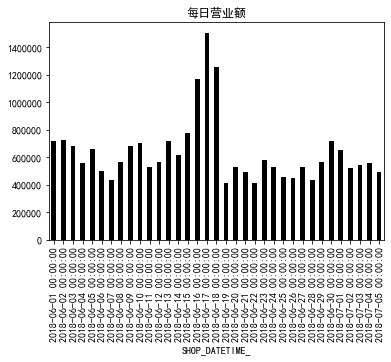

In [34]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文标签 
df1_sum.plot(kind='bar',color="black",title="每日营业额")

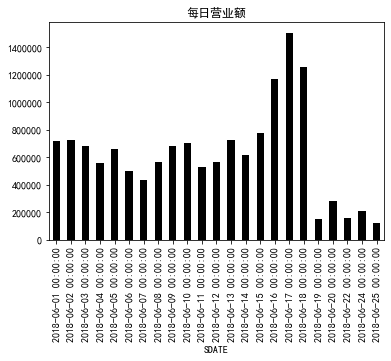

In [35]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文标签 
df2_sum.plot(kind='bar',color="black",title="每日营业额")

#### 每个商店的每人平均消费

In [36]:
df2_spent = df2.groupby(["STORE_CODE", "BASK_CODE_"])["ITEM_SPEND"].sum()
store_index = df2_spent.index.levels[0]
store_a= pd.Series([df2_spent[i].sum() / len(df2_spent[i]) for i in store_index],
                      index=store_index)
store_a

STORE_CODE
A001    57.222725
A004    39.680650
A006    34.559475
A007    56.187459
A008    37.759147
A009    37.987041
A010    34.364906
A012    35.046595
A013    40.157268
A016    41.833902
A017    32.824594
A018    35.813184
A019    40.375303
A021    37.950444
A022    33.283784
D002    56.079878
D003    33.113512
D004    39.118214
D005    36.378782
D006    42.139700
D007    38.080989
D008    33.658275
D009    30.741257
D010    33.614618
dtype: float64

##### 可以看出A001商店的消费均值是57.222725是所有商店中平均消费额最低的，D010是最低的。下图为可视化

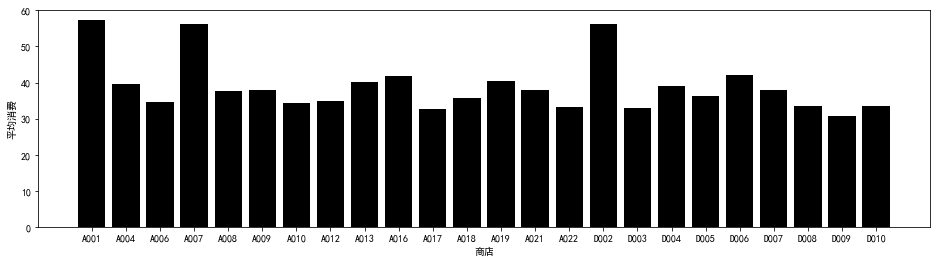

In [37]:
plt.figure(figsize=(16, 4))
plt.bar(store_index, store_a, fc="black")
plt.xlabel("商店")
plt.ylabel("平均消费")
plt.show()

#### 购买者消费金额、消费次数的描述统计

In [53]:
grouped_Customer = df1[['BASK_CODE___','SHOP_DATETIME_', 
          'BASK_SPEND']].sort_values(['SHOP_DATETIME_']).groupby('BASK_CODE___')
grouped_Customer.head()

,BASK_CODE___,SHOP_DATETIME_,BASK_SPEND
0,250458,2018-06-01,8.00
215287,161017,2018-06-01,9.90
215286,161158,2018-06-01,4.00
215285,250476,2018-06-01,86.40
215284,5399,2018-06-01,23.20
215283,5398,2018-06-01,28.73
215282,161038,2018-06-01,57.92
215281,250438,2018-06-01,67.20
215280,160962,2018-06-01,3.00
215279,35068,2018-06-01,86.70


In [54]:
grouped_Customer.count().describe()

,SHOP_DATETIME_,BASK_SPEND
count,281211.000000,281211.000000
mean,2.032467,2.032467
std,1.078907,1.078907
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,7.000000,7.000000


#### 购买物品的价格和折扣分布直方图可视化

Text(0, 0.5, '价格')

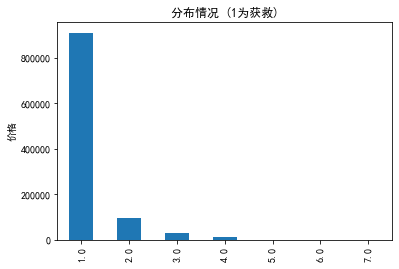

In [45]:
#  依据特征income创造收入人群称呼
prices = []
for price in df2['ITEM_SPEND']:
    if 0 <= price < 20:
        prices.append(1)  #  1
    elif 20 <= price < 50:
        prices.append(2)  # 
    elif 50 <= price < 100:
        prices.append(3)  #
    elif 100 <= price < 500:
        prices.append(4)  #
    elif 500 <= price < 1000:
        prices.append(5)  #
    elif 1000 <= price < 2000:
        prices.append(6)  #
    elif 2000 <= price:
        prices.append(7)  #
        
df2['price'] = pd.DataFrame(prices)
df2.price.value_counts().plot(kind='bar')# 柱状图 
plt.title(u"分布情况 (1为获救)") # 标题
plt.ylabel(u"价格")  

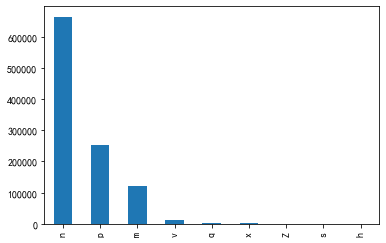

In [46]:
df2.DISCOUNT_TYPE.value_counts().plot(kind='bar')

#### 使用逻辑回归方法预测各个商店的销售总额走势

In [38]:
df1_A001 =df1[df1["STORE_CODE"] == "A001"]
df1_A001.head(20)

,SHOP_DATETIME_,STORE_CODE,POS_NO_,BASK_CODE___,BASK_SPEND
24,2018-06-02,A001,6,229732,7.50
25,2018-06-02,A001,3,25793,52.95
26,2018-06-02,A001,6,229639,46.80
27,2018-06-02,A001,6,229708,30.38
28,2018-06-02,A001,6,229785,21.30
29,2018-06-02,A001,6,229620,21.50
30,2018-06-02,A001,2,125579,4.80
31,2018-06-02,A001,9,267669,44.51
32,2018-06-02,A001,6,229896,4.50
33,2018-06-02,A001,6,229963,67.70


In [39]:
sum_A001=df1_A001.groupby(["SHOP_DATETIME_"])["BASK_SPEND"].sum()
sum_A001   #A001的每日销售总额

SHOP_DATETIME_
2018-06-01    101971.08
2018-06-02     78829.76
2018-06-03     79162.82
2018-06-04     53990.84
2018-06-05     81708.30
2018-06-06     79167.81
2018-06-07     59450.59
2018-06-08     65490.97
2018-06-09    128980.30
2018-06-10     95312.58
2018-06-11     79403.76
2018-06-12    104093.21
2018-06-13    123849.34
2018-06-14     94912.87
2018-06-15    139586.92
2018-06-16    312102.30
2018-06-17    324323.29
2018-06-18    204457.64
2018-06-19     53757.07
2018-06-20     85382.17
2018-06-21     67307.82
2018-06-22     60339.19
2018-06-23     80734.51
2018-06-24     75519.24
2018-06-25     64212.92
2018-06-26     68054.72
2018-06-27     72622.72
2018-06-28     55328.60
2018-06-29     80056.55
2018-06-30     96779.60
2018-07-01     87396.05
2018-07-02     69952.23
2018-07-03     73419.27
2018-07-04     73999.72
2018-07-05     63646.30
Name: BASK_SPEND, dtype: float64

In [40]:
import numpy as np
x = []
y = []
for i in range(len(sum_A001) - 3):
    x.append(list(sum_A001[i:i+3]))
    y.append(sum_A001[i+3])
x = np.array(x)
y = np.array(y)
x, y

(array([[101971.08,  78829.76,  79162.82],
        [ 78829.76,  79162.82,  53990.84],
        [ 79162.82,  53990.84,  81708.3 ],
        [ 53990.84,  81708.3 ,  79167.81],
        [ 81708.3 ,  79167.81,  59450.59],
        [ 79167.81,  59450.59,  65490.97],
        [ 59450.59,  65490.97, 128980.3 ],
        [ 65490.97, 128980.3 ,  95312.58],
        [128980.3 ,  95312.58,  79403.76],
        [ 95312.58,  79403.76, 104093.21],
        [ 79403.76, 104093.21, 123849.34],
        [104093.21, 123849.34,  94912.87],
        [123849.34,  94912.87, 139586.92],
        [ 94912.87, 139586.92, 312102.3 ],
        [139586.92, 312102.3 , 324323.29],
        [312102.3 , 324323.29, 204457.64],
        [324323.29, 204457.64,  53757.07],
        [204457.64,  53757.07,  85382.17],
        [ 53757.07,  85382.17,  67307.82],
        [ 85382.17,  67307.82,  60339.19],
        [ 67307.82,  60339.19,  80734.51],
        [ 60339.19,  80734.51,  75519.24],
        [ 80734.51,  75519.24,  64212.92],
        [ 7

In [41]:
from sklearn import linear_model
train_x, train_y = x[:20], y[:20]
test_x, test_y = x[20:], y[20:]
reg = linear_model.LinearRegression()
reg.fit(train_x, train_y)
linear_predict_y = reg.predict(test_x)
linear_predict_y

array([105475.29492327,  84686.24580801,  80406.30256398,  91053.29289874,
        90971.90267845,  70252.33932454, 109244.73353267, 106761.93309328,
        90612.83181249,  81842.07172623,  95367.77197168,  90010.88931279])

##### 下图是通过逻辑回归对A001商店的预测效果图

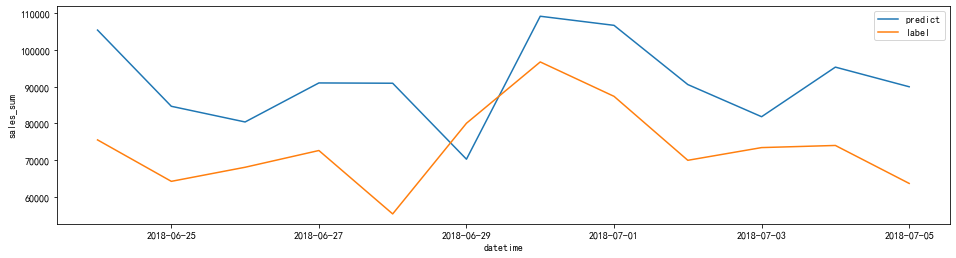

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
mse_linear = mean_squared_error(test_y, linear_predict_y)
plt.figure(figsize=(16, 4))
plt.plot(sum_A001.index[23:],  linear_predict_y, label="predict")
plt.plot(sum_A001.index[23:], test_y, label="label")
plt.legend()
plt.xlabel("datetime")
plt.ylabel("sales_sum")
plt.show()